### Partition face dataset into 8:2 training:test

### Apply PCA on training data by use of eigenvectors and eigenvalues of covaraiance matrix S= (1/N)A(A^T)

### Apply PCA using eigenvectors and eigenvalues of (1/N)(A^T)A

In [1]:
# PCA source: Week 2 slides - Manifold Learning

import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(42)

data = loadmat('face.mat')

X = data['X'] # flat images dim (2576,520)
# l = data['l'].flatten()  # image Labels (1,520)

# Does a 8/2 split of dataset (8 images / 2 images of each person). Training data shuffled. 
def Q1_partition(data):
    X = data['X'] # flat images dim (2576,520)
    X_train, X_test = [], []
    for i in range(0, 520, 10):
        im_train, im_test = train_test_split(X[:, i: i + 10].T, test_size=0.2, random_state=42)
        X_train.append(im_train)    
        X_test.append(im_test)  
  
    return  np.array(X_train).reshape(-1, 2576), np.array(X_test).reshape(-1, 2576)

In [50]:
def display_image(image, label):
    # X[:, image_index]
    image_height, image_width = 46, 56 
    image = image.reshape((image_height, image_width)).T 
    # label = l[image_index]

    plt.imshow(image, cmap='gray', aspect='auto')
    plt.title(f"Face Image - Label: {label}")
    plt.axis('off')
    plt.show()
    # display_image(X_train[1:2].T, "hey")
    # display_image(t1[i:i+1].T, "Hey")

def get_sorted_eigen(M):
    eigenvalues, eigenvectors = np.linalg.eig(M)
    eigenvalues, eigenvectors = np.real(eigenvalues), np.real(eigenvectors)

    sorted_indices = np.argsort(eigenvalues)[::-1]

    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

# S = Covariance Matrix, A = mean centred data, N = #samples
def PCA(batch, threshold = 0.95):
    N, mean, S = process_batch(batch)
    eigenvalues, eigenvectors = get_sorted_eigen(S)
    k = choose_principal_components(threshold, eigenvalues)
    return eigenvalues[:k + 1], eigenvectors[:, :k + 1], mean, N

def choose_principal_components(threshold, eigenvalues):
    covariance_ratios = eigenvalues/np.sum(eigenvalues)
    cum_var = 0
    for k, ratio in enumerate(covariance_ratios):
        cum_var += ratio
        if cum_var >= threshold: return k 

def process_batch(batch):
    mean = np.mean(batch, axis=0)
    A = (batch - mean).T
    N = A.shape[1]
    S = (1/N) * np.dot(A, A.T)
    
    print(batch.shape)
    print(mean.shape)
    print(A.shape)
    print(S.shape)
    return N, mean, S



In [51]:
# They cannot possibly be the same since they have different dimensions. 
X_train, X_test = Q1_partition(data)
print("N, D = ", X_train.shape)
##### Look here FELIX - AAT: S = (1/N) A * A^T, ATA: S = (1/N) A^T * A  
eigenvalues_AAT, eigenvectors_AAT, mean1, N1 = PCA(X_train)
#eigenvalues_ATA, eigenvectors_ATA, mean2, N2 = PCA(X_train)
##########

N, D =  (416, 2576)
(416, 2576)
(2576,)
(2576, 416)
(2576, 2576)


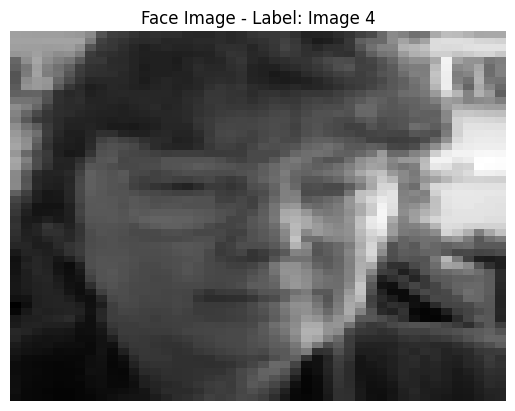

2576 120 416 2576


AttributeError: 'list' object has no attribute 'shape'

In [54]:
def deconstruct(image, eigenvects, mean):
    reduced = image - mean
    coords = []
    for vector in eigenvects.T :
        coords.append(np.dot(reduced, vector))
    return coords


def reconstruct(coords, eigenvects, mean) :
    image = np.array([])
    for vector in eigenvects.T :
        image.append(coords * vector)
    print(image.shape)
    return image + mean


test_image = X[:, 4]
display_image(test_image, "Image 4")
print(len(eigenvectors_AAT), len(eigenvectors_AAT[0]), N1, len(mean1))
deconstruct(test_image, eigenvectors_AAT, mean1)
reconstruct(test_image, eigenvectors_AAT, mean1)

display_image(test_image, "Image 4 after reconstruct")